<div style="text-align:center"><span style="font-size:2em; font-weight: bold;">Energy Efficiency</span></div>

# Introduction

## Source: 
Tsanas, Athanasios and Xifara, Angeliki. (2012). Energy Efficiency. UCI Machine Learning Repository. https://doi.org/10.24432/C51307.

## Dataset Information:
The dataset has information about the heating load and cooling load of buildings as a function of building parameters.

### Features: 8 housing parameters
1. X1 - Relative Compactness

2. X2 - Surface Area

3. X3 - Wall Area

4. X4 - Roof Area

5. X5 - Overall Height

6. X6 - Orientation

7. X7 - Glazing Area

8. X8 - Glazing Area Distribution

### Targets: 2 loads
1. y1 - Heating Load
2. y2 - Cooling Load

## Problem Statement:
Electrical energy consumption is increasing in houses. About 30% of the energy consumed is wasted on inefficient heating and cooling. Reducing energy consumption is necessary to aim for sustainability.

## Objectives:
1. Identify housing parameters that affect heating and cooling load.
2. Build machine learning models to predict the heating and cooling load of houses.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_excel("EnergyEfficiency.xlsx")
df.columns

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

In [3]:
# The features are named (X1 - ... - X8). Renaming for better readability
df.columns = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height","orientation", "glazing_area", "glazing_area_distribution", 
              "heating_load","cooling_load"] 

# Details about the dataset

In [4]:
df.head()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


In [5]:
# Making sure there's no copyright at the bottom that might change the shape
df.tail()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
763,0.64,784.0,343.0,220.5,3.5,5,0.4,5,17.88,21.40
764,0.62,808.5,367.5,220.5,3.5,2,0.4,5,16.54,16.88
765,0.62,808.5,367.5,220.5,3.5,3,0.4,5,16.44,17.11
766,0.62,808.5,367.5,220.5,3.5,4,0.4,5,16.48,16.61
767,0.62,808.5,367.5,220.5,3.5,5,0.4,5,16.64,16.03


The values in the first 7 features are the same in the first 5 rows. Therefore, I find the number of unique values.

In [6]:
df.nunique()

relative_compactness          12
surface_area                  12
wall_area                      7
roof_area                      4
overall_height                 2
orientation                    4
glazing_area                   4
glazing_area_distribution      6
heating_load                 587
cooling_load                 636
dtype: int64

There are very few unique values for each feature. The dataset is trying to explore how different combinations of a few values impact the target.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   relative_compactness       768 non-null    float64
 1   surface_area               768 non-null    float64
 2   wall_area                  768 non-null    float64
 3   roof_area                  768 non-null    float64
 4   overall_height             768 non-null    float64
 5   orientation                768 non-null    int64  
 6   glazing_area               768 non-null    float64
 7   glazing_area_distribution  768 non-null    int64  
 8   heating_load               768 non-null    float64
 9   cooling_load               768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


# Exploratory Data Analysis

In [8]:
df.describe()

,relative_compactness,surface_area,wall_area,roof_area,overall_height,orientation,glazing_area,glazing_area_distribution,heating_load,cooling_load
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307195,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090204,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


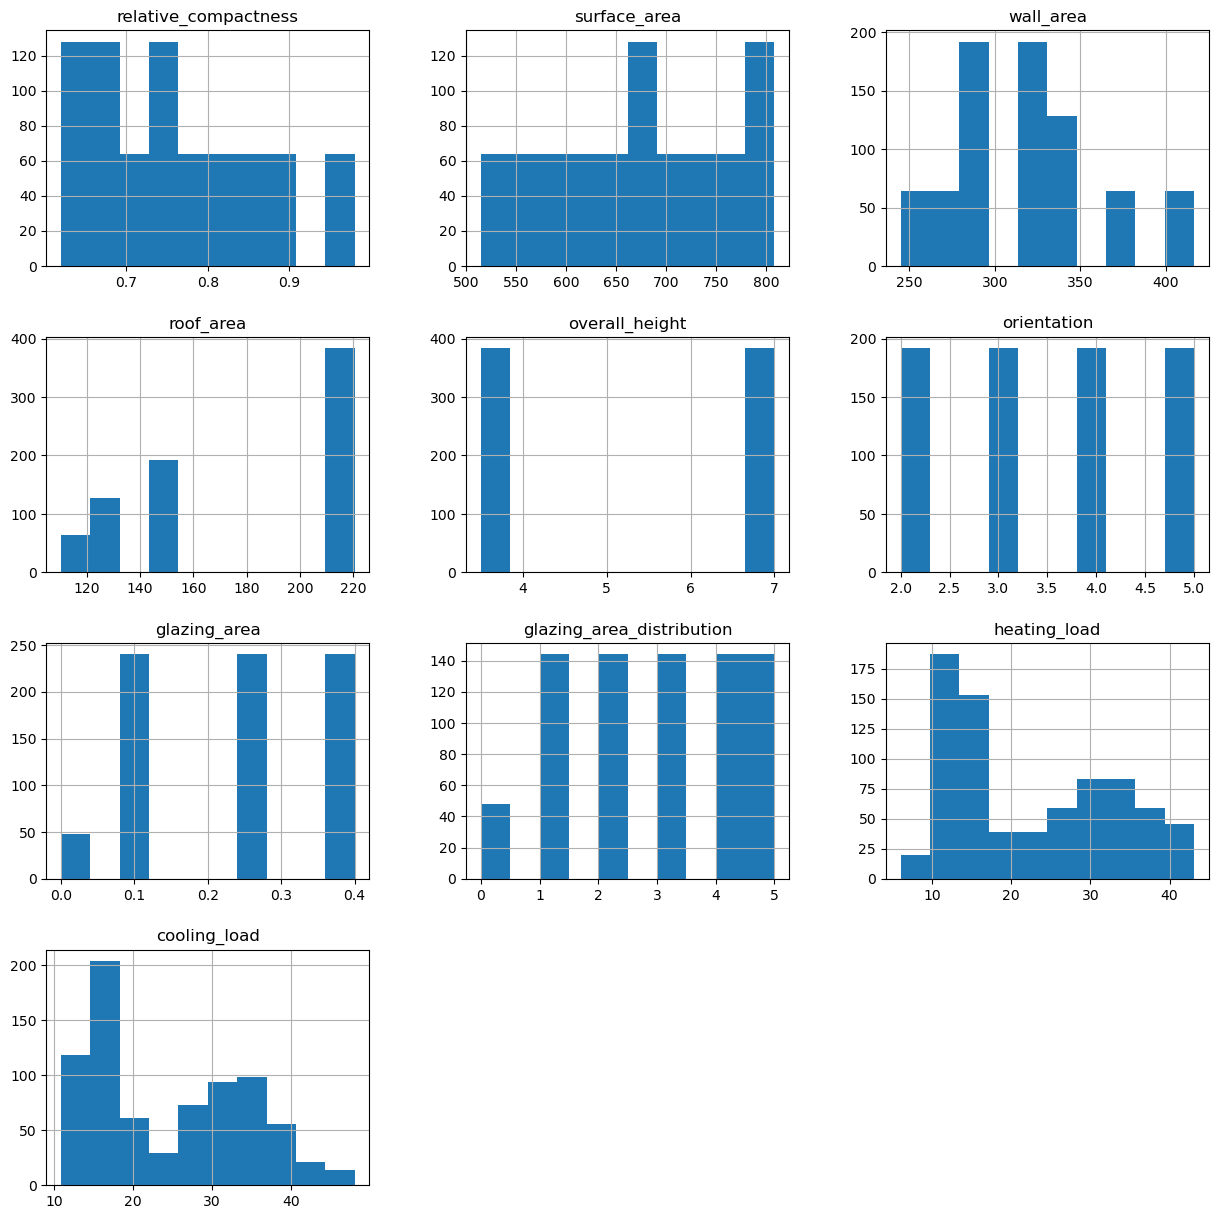

In [9]:
#To find the frequency distribution
df.hist(figsize=(15,15))
plt.show()

In [10]:
features = ["relative_compactness", "surface_area", "wall_area", "roof_area", "overall_height","orientation", "glazing_area", "glazing_area_distribution"]
targets = ["heating_load", "cooling_load"]

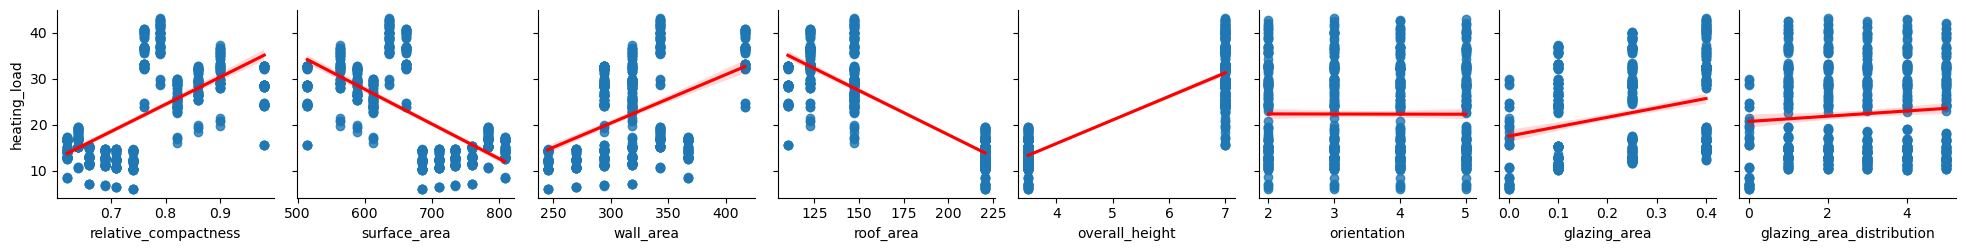

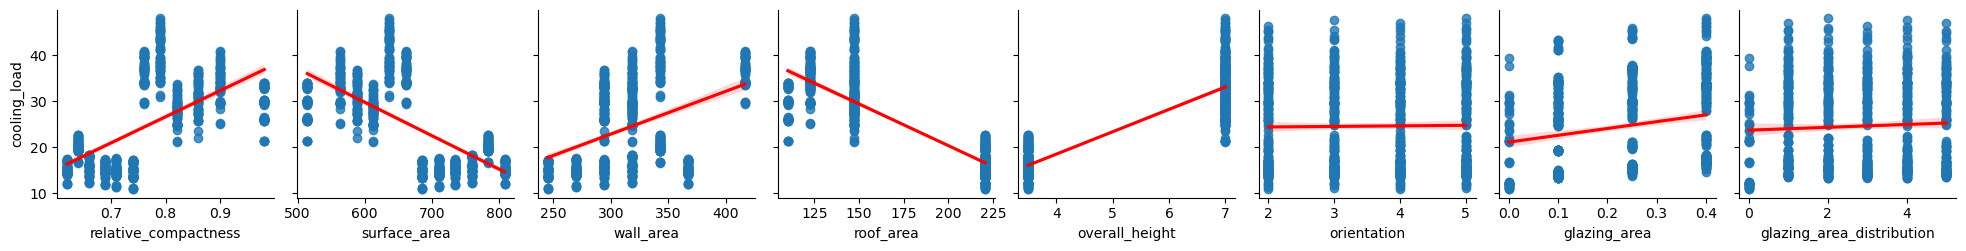

In [11]:
import warnings
warnings.filterwarnings('ignore')

# To visualize the relationship between features and target
for target in targets:
    data = df[features + [target]]
    g = sns.pairplot(data, x_vars=features, y_vars=[target], kind="reg", plot_kws={'line_kws':{'color':'red'}})
    plt.show()

Linear relationships can be observed in relative compactness, surface area, wall area, roof area, and overall height.

The data points in relative compactness and surface area form clusters.

In [ ]:
# To find the correlation between all the features and targets
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(method='spearman'), annot=True, cmap="Greens", fmt=".2f", annot_kws={"size": 10})
plt.title('Spearman Correlation Heatmap')
plt.show()

1. Relative compactness and surface area are perfectly negatively correlated.
2. Orientation, glazing area, and glazing area distribution are not correlated to other features.
3. Orientation has no correlation to heating load but is very slightly correlated to cooling load.
4. Heating and cooling loads are highly correlated.

In [12]:
X = df[features].copy()
y = df["heating_load"]

Since the scatter plot could not adequately identify linear relationships in orientation, glazing area, and glazing area distribution, I have used mutual information to identify if these attributes can explain the values in the targets.

In [13]:
from sklearn.feature_selection import mutual_info_regression
def make_mi_scores(X, y):
    mi_scores = mutual_info_regression(X, y)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")

relative_compactness         1.718523
surface_area                 1.714418
wall_area                    1.099339
roof_area                    0.928449
glazing_area                 0.702139
overall_height               0.661484
glazing_area_distribution    0.216164
orientation                  0.000000
Name: MI Scores, dtype: float64


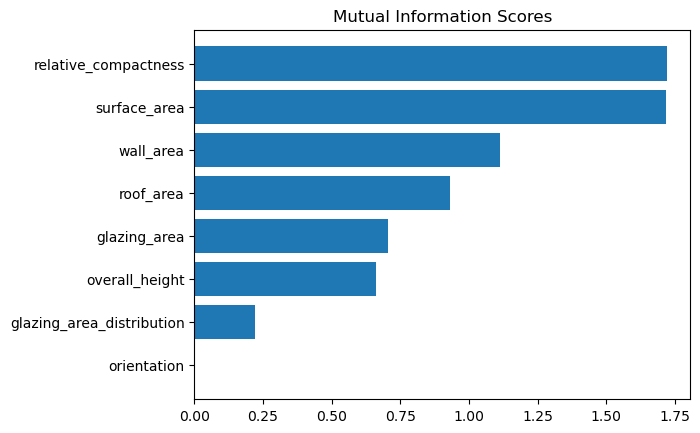

In [14]:
print(make_mi_scores(X,y))
plot_mi_scores(make_mi_scores(X,y))

surface_area                 1.417322
relative_compactness         1.415916
roof_area                    0.876900
wall_area                    0.866197
glazing_area                 0.733829
overall_height               0.679422
glazing_area_distribution    0.148725
orientation                  0.000000
Name: MI Scores, dtype: float64


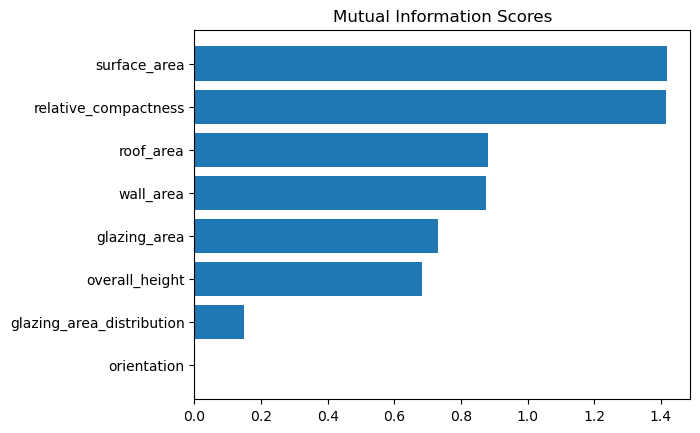

In [15]:
y2 = df["cooling_load"]
print(make_mi_scores(X,y2))
plot_mi_scores(make_mi_scores(X,y2))

In [16]:
X.drop("orientation",axis = 1, inplace = True)
X.drop("surface_area",axis = 1, inplace = True)
X["glazing_area_distribution"].replace({0:0,1:1,2:1,3:1,4:1,5:1}, inplace=True)

There is no relationship between orientation and heating load.
Since relative compactness and surface area are perfectly negatively correlated, I have dropped surface area.
The effect on the loads is almost same for glazing area distributions for values 1 and above, therefore, the values have been replaced to 1.

# Models

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

## Heating Load

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [19]:
def evaluate_regression_models(X_train, X_test, y_train, y_test):
    models = [
        ("Linear Regression", LinearRegression()),
        ("Ridge Regression", Ridge()),
        ("Lasso Regression", Lasso()),
        ("Decision Tree", DecisionTreeRegressor()),
        ("Random Forest", RandomForestRegressor()),
        ("Gradient Boosting", GradientBoostingRegressor()),
        ("SVM", SVR()),  
        ("XGBoost", XGBRegressor()),
        ("K-Nearest Neighbors", KNeighborsRegressor())]
    
    metrics = []
    
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        metrics.append((model_name, mae, rmse, mse, r2))
    

    metrics_df = pd.DataFrame(metrics, columns=['Model', 'Mean Absolute Error', 
                                                'Root Mean Squared Error', 'Mean Squared Error', 'R-squared (R2)'])
    
    return metrics_df

In [20]:
print("------------------------- Predictions for y1 - Heating Load -----------------------------------------------------")
evaluate_regression_models(X_train,X_test,y_train, y_test)

------------------------- Predictions for y1 - Heating Load -----------------------------------------------------


,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.110546,2.898841,8.403280,0.921641
1,Ridge Regression,2.222620,2.969752,8.819429,0.917760
2,Lasso Regression,3.271708,4.498813,20.239314,0.811271
3,Decision Tree,0.453223,0.746425,0.557150,0.994805
4,Random Forest,0.396767,0.556660,0.309870,0.997111
5,Gradient Boosting,0.397696,0.554361,0.307316,0.997134
6,SVM,3.545008,4.920059,24.206977,0.774274
7,XGBoost,0.392152,0.548922,0.301315,0.997190
8,K-Nearest Neighbors,0.559423,0.991927,0.983918,0.990825


## Cooling Load

In [21]:
X2 = df[features].copy()
X2.drop("relative_compactness",axis = 1, inplace = True)
X2.drop("orientation",axis = 1, inplace = True)
y2 = df["cooling_load"]
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2)
print("------------------------- Predictions for y2 - Cooling Load -----------------------------------------------------")
evaluate_regression_models(X_train2,X_test2,y_train2, y_test2)

------------------------- Predictions for y2 - Cooling Load -----------------------------------------------------


,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Linear Regression,2.433444,3.316336,10.998084,0.872348
1,Ridge Regression,2.423883,3.282555,10.775167,0.874936
2,Lasso Regression,3.150732,4.425674,19.586588,0.772664
3,Decision Tree,1.421163,2.373636,5.634150,0.934606
4,Random Forest,1.327957,2.172274,4.718775,0.945231
5,Gradient Boosting,1.158621,1.749765,3.061677,0.964464
6,SVM,3.544076,4.994192,24.941953,0.710506
7,XGBoost,1.421495,2.374860,5.639961,0.934539
8,K-Nearest Neighbors,1.702854,2.293102,5.258318,0.938968


## Best Models
Tree based models have the best Mean Absolute Error and R-squared(R2)
1. Decision Tree
2. Random Forest
3. Gradient Boosting
4. XGBoost

K-Nearest Neighbors is also performing well.

# Hyperparameter Optimization

In [22]:
from sklearn.model_selection import GridSearchCV

def best_params(estimator, param_grid, X_train, y_train, scoring):
    grid_search = GridSearchCV(estimator=estimator, param_grid=param_grid, cv=5, scoring=scoring)
    grid_search.fit(X_train, y_train)

    best_params = grid_search.best_params_
    best_score = grid_search.best_score_

    print("Best Parameters:", best_params)
    print("Best Score MAE:", -1 * best_score)

In [23]:
param_grid_tree = {
    'max_depth': [3, 5, 10],
    'min_samples_split': [1, 2, 5, 10],
    'min_samples_leaf': [1, 3, 5]
}
best_params(DecisionTreeRegressor(), param_grid_tree, X_train, y_train, 'neg_mean_absolute_error')

Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Best Score MAE: 0.3458725502891248


In [24]:
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_params(RandomForestRegressor(), param_grid_rf, X_train, y_train, 'neg_mean_absolute_error')

Best Parameters: {'max_depth': 7, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best Score MAE: 0.3552150182811803


In [25]:
param_grid_gb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
best_params(GradientBoostingRegressor(), param_grid_gb, X_train, y_train, 'neg_mean_absolute_error')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}
Best Score MAE: 0.34499794737123196


In [26]:
param_grid_xgb = {
    'max_depth': [3, 4, 5],
    'learning_rate': [0.1, 0.01, 0.001],
    'n_estimators': [85, 100, 200, 300],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}
best_params(XGBRegressor(), param_grid_xgb, X_train, y_train, 'neg_mean_absolute_error')

Best Parameters: {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200, 'subsample': 0.8}
Best Score MAE: 0.343442264457085


In [27]:
def final_models(X_train, X_test, y_train, y_test):
    models = [
        ("Decision Tree", DecisionTreeRegressor(max_depth=10, min_samples_leaf=1, min_samples_split=2)),
        ("Random Forest", RandomForestRegressor(max_depth=7, min_samples_leaf=1, min_samples_split=2, n_estimators=200)),
        ("Gradient Boosting", GradientBoostingRegressor(learning_rate=0.1, max_depth=3, min_samples_leaf=2, min_samples_split=2, n_estimators=200)),
        ("XGBoost", XGBRegressor(colsample_bytree=0.9, learning_rate=0.1, max_depth=3, n_estimators=200, subsample=0.8))
    ]
    
    metrics = []
    
    for model_name, model in models:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)
        rmse = mean_squared_error(y_test, y_pred, squared=False)
        r2 = r2_score(y_test, y_pred)
        
        metrics.append((model_name, mae, rmse, mse, r2))
    

    metrics_df = pd.DataFrame(metrics, columns=['Model', 'Mean Absolute Error', 'Root Mean Squared Error', 'Mean Squared Error', 'R-squared (R2)'])
    
    return metrics_df

In [28]:
print("------------------------- Predictions for y1 - Heating Load -----------------------------------------------------")
final_models(X_train,X_test,y_train, y_test)

------------------------- Predictions for y1 - Heating Load -----------------------------------------------------


,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Decision Tree,0.385515,0.543248,0.295119,0.997248
1,Random Forest,0.391264,0.548768,0.301146,0.997192
2,Gradient Boosting,0.394370,0.549159,0.301576,0.997188
3,XGBoost,0.395583,0.550795,0.303375,0.997171


In [29]:
print("------------------------- Predictions for y2 - Cooling Load -----------------------------------------------------")
final_models(X_train2,X_test2,y_train2, y_test2)

------------------------- Predictions for y2 - Cooling Load -----------------------------------------------------


,Model,Mean Absolute Error,Root Mean Squared Error,Mean Squared Error,R-squared (R2)
0,Decision Tree,1.419986,2.372156,5.627126,0.934688
1,Random Forest,1.233591,1.953692,3.816911,0.955698
2,Gradient Boosting,1.202238,1.826233,3.335126,0.961290
3,XGBoost,1.231333,1.905509,3.630964,0.957856


# Conclusion

The housing parameters that can be adjusted to reduce heating and cooling loads are relative compactness/surface area, roof area, wall area, and overall height. 

The most energy-efficient building will have average relative compactness or high surface area, low wall area, low roof area, and low overall height.

The best machine learning models for predicting heating and cooling load are tree-based models, such as Decision Tree, Random Forest, Gradient Boosting, and XGBoost.